# 🧪 Guidelines for Numerical Codes

In scientific computing, writing code that merely produces the correct number is **not enough**. What truly matters is *how* the solution is structured—especially the distinction between **general methods** and **specific problems**.

As emphasized in the [*Numerical Programming Guide*](https://hplgit.github.io/edu/py_vs_m/numerical_programming_guide.pdf):

> *"We want to solve a special problem by a general mathematical extent. This is often the case when mathematics is applied to practical problems. The software should reflect this division."*

### Why this separation matters:
1. **Conceptual clarity**: It reinforces understanding of the *general nature* of numerical methods (e.g., the Trapezoidal rule) and how they apply to *specific* functions like $ g(t) = e^{-t^4} $.
2. **Reusability**: A well-isolated general function (like a Trapezoidal integrator) can be reused—without modification—for countless other integrals.

This is not just good math—it’s **fundamental software engineering**:
> *"Programs should consist of general pieces (functions) that can be reused without modifications to solve other problems."*

Following this practice, our notebook:
- Implements the **Trapezoidal rule** as a general, standalone function,
- Defines the **integrand** $ g(t) $ separately,
- Uses a minimal **main section** to combine them for this specific task.

This structure scales naturally when problems grow in complexity—making it ideal for teaching, research, and real-world scientific software.

---

**Reference**:  
*Guidelines for Numerical Codes*  
Hans Petter Langtangen¹,²  
¹ Simula Research Laboratory  
² University of Oslo  
May 28, 2010  
[https://hplgit.github.io/edu/py_vs_m/numerical_programming_guide.pdf](https://hplgit.github.io/edu/py_vs_m/numerical_programming_guide.pdf)

## 📐 Numerical Integration with the Trapezoidal Rule

This notebook demonstrates how to approximate a definite integral numerically using the **Trapezoidal rule**—a foundational technique in scientific computing. We apply it to the smooth, bell-shaped function  

$$
g(t) = e^{-t^4},
$$

which has no elementary antiderivative, making numerical methods essential.

Following a **minimalist and clear coding style**, we:
- Implement the Trapezoidal rule from scratch,
- Compute the integral over $[-2, 2]$,
- Visualize the function and the area under the curve.

This approach emphasizes **understanding over abstraction**: every line serves a purpose, and the algorithm mirrors its mathematical definition closely—ideal for learning and teaching numerical methods in engineering and science.

## 📏 Trapezoidal Rule

The Trapezoidal rule, defined by

$$
\int_a^b f(x)\,dx \approx h \left[ \frac{1}{2}\big(f(a) + f(b)\big) + \sum_{i=1}^{n-1} f(a + i h) \right],
\quad h = \frac{b - a}{n}
\tag{1}
$$

In [6]:
def Trapezoidal(f, a, b, n):
    """
    Approximate the definite integral of f from a to b using the Trapezoidal rule.
    
    Parameters:
        f : callable
            Function to integrate.
        a, b : float
            Integration limits.
        n : int
            Number of subintervals.
    
    Returns:
        float : Approximation of ∫_a^b f(t) dt
    """
    h = (b - a) / float(n)
    s = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        s = s + f(a + i * h)
    return h * s

## 🧮 Defining the Integrand

The function to integrate is  
$$
g(t) = e^{-t^4}.
$$  
This smooth, rapidly decaying function is symmetric about $ t = 0 $ and lacks a closed-form antiderivative, making it a good candidate for numerical integration.

In [7]:
from math import exp

def g(t):
    """Integrand function: g(t) = exp(-t⁴)"""
    return exp(-t**4)

## ⚙️ Setting Integration Parameters

We integrate over the interval $[a, b] = [-2, 2]$.  
The parameter $ n = 1000 $ controls the number of subintervals:  
larger $ n $ → finer approximation → higher accuracy (at modest computational cost for smooth functions like $ g $).

In [8]:
# Integration limits and resolution
a, b = -2, 2
n = 1000

result = Trapezoidal(g, a, b, n)
print(f"Approximate integral of g(t) from {a} to {b} = {result:.6f}")

Approximate integral of g(t) from -2 to 2 = 1.812805


## 📈 Visualizing the Function and Area

A plot helps confirm that our integrand behaves as expected and shows the region being integrated.  
We fill the area under $ g(t) $ to visually represent the definite integral $\int_{-2}^{2} g(t)\,dt$.

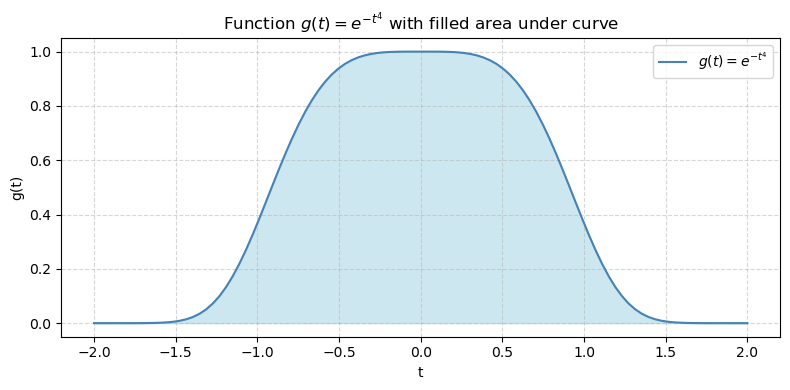

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Generate dense t values for smooth plotting
t_vals = np.linspace(a, b, 100)
g_vals = [g(t) for t in t_vals]

plt.figure(figsize=(8, 4))
plt.plot(t_vals, g_vals, label=r'$g(t) = e^{-t^4}$', color='steelblue')
plt.fill_between(t_vals, g_vals, color='lightblue', alpha=0.6)
plt.xlabel('t')
plt.ylabel('g(t)')
plt.title('Function $g(t) = e^{-t^4}$ with filled area under curve')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()